In [1]:
import tensorflow as tf
import pandas as pd
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
from pandas import get_dummies
%matplotlib inline

In [2]:
#Place the CSV file in the same folder in which you're running this notebook
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,petallength,petalwidth,sepallength,sepalwidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


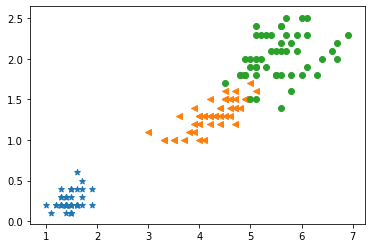

In [4]:
plt.scatter(df[df['species'] == 0]['sepallength'], df[df['species'] == 0]['sepalwidth'], marker='*')
plt.scatter(df[df['species'] == 1]['sepallength'], df[df['species'] == 1]['sepalwidth'], marker='<')
plt.scatter(df[df['species'] == 2]['sepallength'], df[df['species'] == 2]['sepalwidth'], marker='o')

In [6]:
x = df[['petallength', 'petalwidth', 'sepallength', 'sepalwidth']].values
y = df['species'].values
y = get_dummies(y)
y = y.values

In [7]:
x = tf.Variable(x, dtype=tf.float32)

In [8]:
Number_of_features = 4
Number_of_units = 3 
 
# weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))  
bias = tf.Variable(tf.zeros([Number_of_units]))
 
def perceptron(x):
    z = tf.add(tf.matmul(x, weight), bias)
    output = tf.nn.softmax(z)
    return output


In [10]:
optimizer = tf.optimizers.Adam(.01)

In [12]:
def train(i):
    for n in range(i):
        loss=lambda: abs(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=perceptron(x))))
        optimizer.minimize(loss, [weight, bias])

train(1000)

In [13]:
tf.print(weight)

[[0.684310317 0.895633 -1.0132345]
 [2.6424644 -1.13437736 -3.20665336]
 [-2.96634197 -0.129377216 3.2572844]
 [-2.97383809 -3.13501668 3.2313652]]


In [14]:
ypred = perceptron(x)
ypred = tf.round(ypred)
accuracy_score(y, ypred)

0.98